In [189]:
compressive_resistance_mean = 3 #MPa -from Tubaldi et al. (2018)
compressive_resistance_cv = 0.15 #dimensionless -from Eidsvig et al. (2021)

In [190]:
compressive_resistance_std = compressive_resistance_mean * compressive_resistance_cv #MPa
print(compressive_resistance_std)

0.44999999999999996


In [191]:
# For more info, look at https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [192]:
pi = math.pi

In [193]:
no_samples = 100000
compressive_resistance_values = np.linspace(compressive_resistance_mean-3*compressive_resistance_std, compressive_resistance_mean+3*compressive_resistance_std, no_samples)

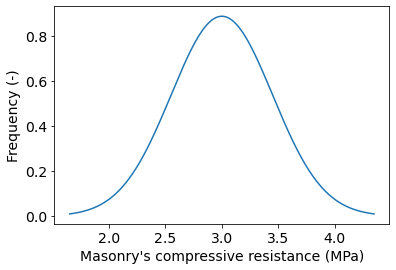

In [194]:
plt.plot(compressive_resistance_values, stats.norm.pdf(compressive_resistance_values, compressive_resistance_mean, compressive_resistance_std))
plt.xlabel("Masonry's compressive resistance (MPa)") #for more info, look at https://www.delftstack.com/howto/matplotlib/python-matplotlib-plot-superscript/#:~:text=To%20make%20subscripts%2C%20you%20have,will%20be%20over%20the%20character.
plt.ylabel("Frequency (-)")
characters_size = 14
plt.rc('axes', labelsize = characters_size) #for more info, look at https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rc('xtick', labelsize = characters_size)
plt.rc('ytick', labelsize = characters_size)


In [195]:
#import random #for more info, https://stackoverflow.com/questions/30030659/in-python-what-is-the-difference-between-random-uniform-and-random-random#:~:text=It's%20very%20common%20to%20generate,to%20specify%20a%20different%20range.

#unif_random_numbers = np.random.uniform(0,1, no_samples) #for more info, https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

#print(unif_random_numbers)

In [196]:
#To guarantee reproducibility, the seed function can be used. Random.uniform() returns a new random number from a PRNG sequence. When that PRNG sequence is
#seeded with the same value, it produces the same sequence. Random is seeded with current system time on module import by default.
#The seed must be stated explicitly to enable reproduction of the same sequence, which can be important for simulations.
#for more, https://stackoverflow.com/questions/32489360/do-i-need-to-use-random-seed-with-random-uniform-to-ensure-i-get-different-s

import scipy as sp #for more, https://subscription.packtpub.com/book/big-data-&-business-intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution
sp.random.seed(2)

unif_random_numbers = sp.random.uniform(low=0, high=1, size = no_samples)
unif_random_numbers[0:5]

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ])

In [197]:
compressive_resistance_realizations_standard = stats.norm.ppf(unif_random_numbers) #for more info, https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p
compressive_resistance_realizations_standard[0:5]

array([-0.16113153, -1.9443566 ,  0.12480864, -0.16283953, -0.20095264])

In [198]:
compressive_resistance_realizations_distribution = (compressive_resistance_std * compressive_resistance_realizations_standard) + compressive_resistance_mean #for more info, https://www.probabilitycourse.com/chapter4/4_2_3_normal.php
compressive_resistance_realizations_distribution[0:5]

array([2.92749081, 2.12503953, 3.05616389, 2.92672221, 2.90957131])

In [199]:
Rd_arch = 386 #kN
Rd_arch_new = (Rd_arch/compressive_resistance_mean) * compressive_resistance_realizations_distribution
Rd_arch_new[0:5]

array([376.67048419, 273.42175287, 393.22642047, 376.57159136,
       374.36484198])

In [200]:
Rd_arch_new = np.array([Rd_arch_new]).T
Rd_arch_new[0:5]

array([[376.67048419],
       [273.42175287],
       [393.22642047],
       [376.57159136],
       [374.36484198]])

In [201]:
#Rd_tot_new.to_csv('capacity') #for more, https://www.codegrepper.com/code-examples/python/numpy+to_csv
import pandas as pd
pd.DataFrame(Rd_arch_new).to_csv("capacity.csv")